# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

# Load Data

In [3]:
df = pd.read_csv('data/M1_final.csv')
df_0 = df.copy()

# Clean Dataset

## Drop NaN

In [4]:
print(df.shape)
df = df.dropna(axis=0)
print(df.shape)

(28820, 23)
(28818, 23)


## Dtypes

In [5]:
df['Dew Point'] = df['Dew Point'].apply(lambda r : r.split()[0])
df['Dew Point'] = pd.to_numeric(df['Dew Point'])

## New Features

### Simplify 'Wind'

In [6]:
df['Wind'] = df['Wind'].apply(lambda r: r[0])

### Simplify 'Condition'

In [7]:
def simplify_condition(r):
    if 'Wintry' in r:
        r = 'snow'
    if 'Snow' in r:
        r = 'snow'
    if 'Cloudy' in r:
        r = 'cloudy'
    if 'Rain' in r:
        r = 'rain'
    if 'Fog' in r:
        r = 'fog'
    if 'Drizzle' in r:
        r='fog'
    if 'Fair' in r:
        r='fair'
    return r
    
df['Cond'] = df['Condition'].apply(lambda r : simplify_condition(r))

## Numerical cols

In [8]:
df_num = df.loc[:, df.dtypes != np.object]
df_num.shape

(28818, 18)

## Categorical cols

In [9]:
df_cat = df.loc[:, df.dtypes == np.object]
df_cat.shape

(28818, 6)

# Machine Learning

## 1) Split dataset

In [10]:
X = df.drop('TAXI_OUT', axis=1)
y = df['TAXI_OUT']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## 2) Feature Selection

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error

def crossVal_model(numerical_features, categorical_features, estimator, X_train, y_train):
    
    #preprocessing
    numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
    categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown = "ignore"))

    preprocessor = make_column_transformer((numerical_pipeline, numerical_features), 
                                           (categorical_pipeline, categorical_features))
    
    #model
    model = make_pipeline(preprocessor, estimator)
    
    #cross validation
    y_pred = cross_val_predict(model, X_train, y_train, cv=5)
    #scr = cross_val_score(model, X_train, y_train, cv=5).mean()
    rmse = mean_squared_error(y_train, y_pred, squared=True)
    mse = mean_squared_error(y_train, y_pred, squared=False)
    mxe = max_error(y_train, y_pred)
                    
    print('model : ',estimator.__class__.__name__)
    print('rmse = {:.2f}'.format(rmse))
    print('mse = {:.2f}'.format(mse))
    print('max error = {:.2f}'.format(mxe))
    
    #plot
    
    plt.scatter(y_train, y_pred)
    plt.xlabel('true')
    plt.ylabel('pred')
    plt.show();

model :  DecisionTreeRegressor
rmse = 44.84
mse = 6.70
max error = 25.80


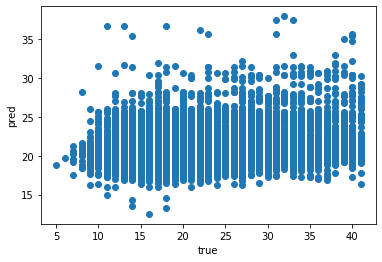

In [13]:
from sklearn.tree import DecisionTreeRegressor
estimator = DecisionTreeRegressor(random_state=42)

num_cols = ['Temperature']
cat_cols = ['Cond']

crossVal_model(num_cols, cat_cols, estimator, X_train, y_train)

model :  DecisionTreeRegressor
rmse = 41.71
mse = 6.46
max error = 25.80


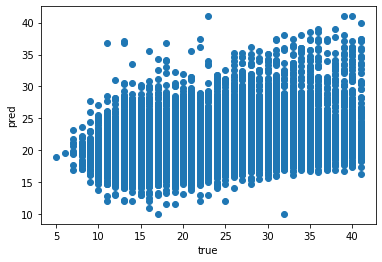

In [14]:
num_cols = ['Temperature']
cat_cols = ['Condition', 'Wind']

crossVal_model(num_cols, cat_cols, estimator, X_train, y_train)

model :  DecisionTreeRegressor
rmse = 36.48
mse = 6.04
max error = 26.00


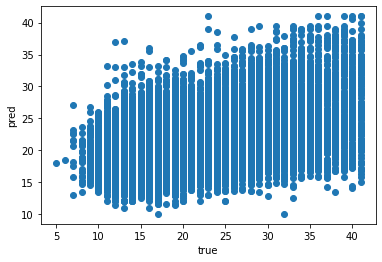

In [15]:
num_cols = ['Wind Gust', 'Pressure', 'Temperature']
cat_cols = ['Cond', 'Wind']

crossVal_model(num_cols, cat_cols, estimator, X_train, y_train)

model :  DecisionTreeRegressor
rmse = 36.15
mse = 6.01
max error = 26.00


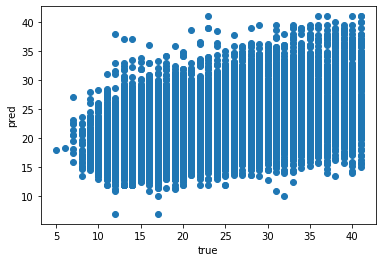

In [16]:
num_cols = ['Wind Gust', 'Pressure', 'Temperature', 'Wind Speed', 'DAY_OF_MONTH', 'Dew Point', 'DAY_OF_WEEK']
cat_cols = ['Cond', 'Wind']

crossVal_model(num_cols, cat_cols, estimator, X_train, y_train)

## 3) Model Selection

model :  LinearRegression
rmse = 44.73
mse = 6.69
max error = 22.76


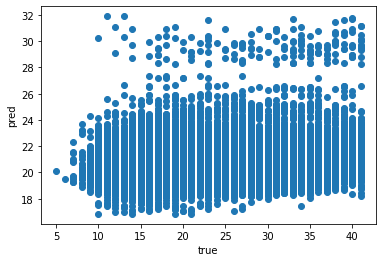

model :  Ridge
rmse = 44.73
mse = 6.69
max error = 22.74


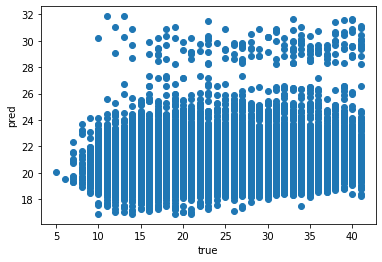

model :  Lasso
rmse = 46.86
mse = 6.85
max error = 20.16


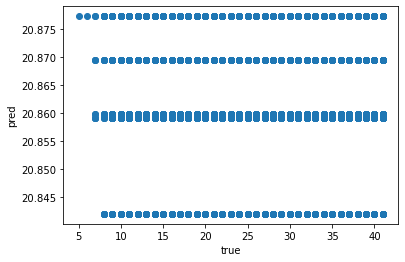

model :  KNeighborsRegressor
rmse = 39.95
mse = 6.32
max error = 26.80


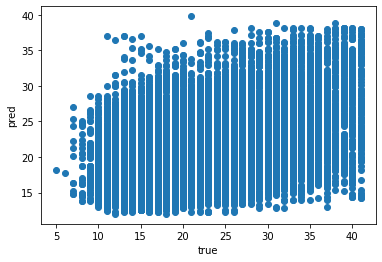

model :  SVR
rmse = 43.28
mse = 6.58
max error = 24.90


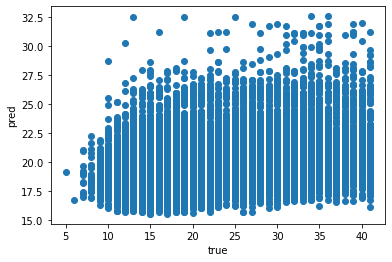

model :  DecisionTreeRegressor
rmse = 36.12
mse = 6.01
max error = 26.00


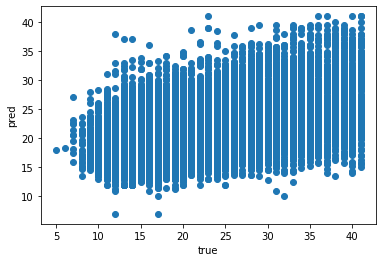

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
knn = KNeighborsRegressor()
svr = SVR()
tree = DecisionTreeRegressor()



list_estimators = [reg, ridge, lasso, knn, svr, tree]

for estimator in list_estimators:
    crossVal_model(num_cols, cat_cols, estimator, X_train, y_train)

# TEST

model :  DecisionTreeRegressor
rmse = 36.03
mse = 6.00
max error = 25.06


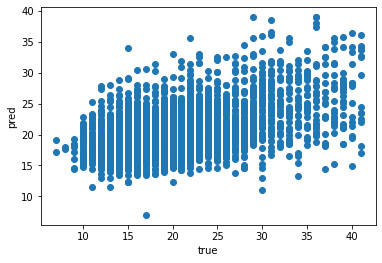

In [18]:
#preprocess
numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown = "ignore"))

preprocessor = make_column_transformer((numerical_pipeline, num_cols), 
                                       (categorical_pipeline, cat_cols))

#model
estimator = DecisionTreeRegressor()
model = make_pipeline(preprocessor, estimator)
model.fit(X_train, y_train)

#metrics
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=True)
mse = mean_squared_error(y_test, y_pred, squared=False)
mxe = max_error(y_test, y_pred)

print('model : ',estimator.__class__.__name__)
print('rmse = {:.2f}'.format(rmse))
print('mse = {:.2f}'.format(mse))
print('max error = {:.2f}'.format(mxe))

#plot

plt.scatter(y_test, y_pred)
plt.xlabel('true')
plt.ylabel('pred')
plt.show();